In [43]:
import numpy as np
import pandas_datareader.data as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression
import yfinance as yf
#for pdr to overvrite with yfinance
yf.pdr_override()
from datetime import datetime

In [44]:
tickers = ["AAPL", "MSFT", "PLTR", "IBM", "^GSPC"]
start = dt.datetime(2020, 11, 1)
end = dt.datetime(2023, 1, 1)
data = pdr.get_data_yahoo(tickers, start, interval="1mo")

[*********************100%***********************]  5 of 5 completed


In [45]:
data = data["Adj Close"]

In [46]:
log_returns = np.log(data/data.shift())

In [47]:
cov = log_returns.cov()

In [48]:
var = log_returns["^GSPC"].var()

In [49]:
var

0.0028023600326870382

In [50]:
cov.loc["AAPL", "^GSPC"]/var
#Beta value of APPLE stock monthly if market goes up 10% apple will go up 12%

1.2270239798435298

In [51]:
cov.loc["^GSPC"]/var
#SP500 has beta 1

AAPL     1.227024
IBM      0.349584
MSFT     1.059534
PLTR     1.076161
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [52]:
X = log_returns["^GSPC"].iloc[1:].to_numpy().reshape(-1, 1)
Y = log_returns["AAPL"].iloc[1:]. to_numpy().reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

lin_reg.coef_[0, 0]

1.2270239798435298

In [53]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


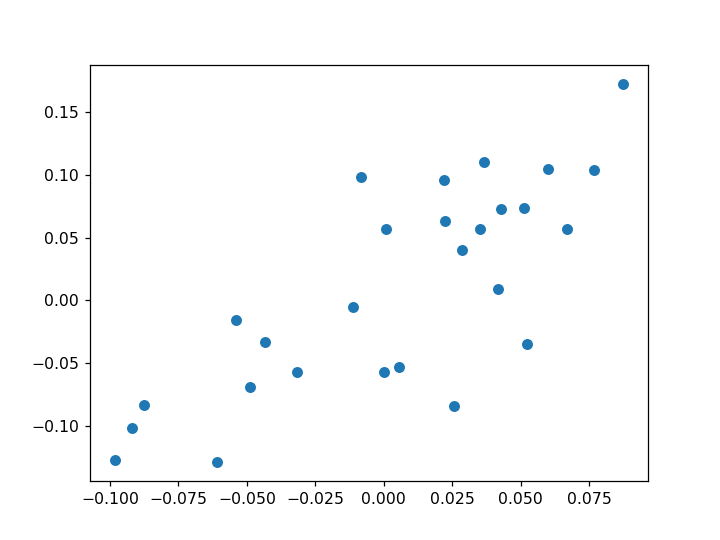

In [54]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

# CAPM Capital Asset Pricing Model

### Formula

$ER_i = R_f + \beta_i(ER_m - R_f)$
* $ER_i$: Expected return from investment
* $R_f$: Risk free return
* $\beta_i$: The beta of the investment
* $(ER_m - R_f)$: Market risk premium